Цель исследования — провести комплексный анализ рынка недвижимости в Берлине на основе актуальных данных, чтобы выявить основные тенденции, структуру предложения и особенности динамики продаж. В рамках исследования планируется:
Оценить распределение объектов по количеству комнат, этажам, типу недвижимости (жилое/коммерческое);
Проанализировать ценовые характеристики (в том числе цену за квадратный метр);
Изучить, как долго объекты находятся на рынке;
Выявить сегменты с наибольшей ликвидностью и привлекательностью для покупателей и инвесторов.
Результаты анализа позволят сформулировать рекомендации для потенциальных покупателей, инвесторов и девелоперов, а также дадут представление о текущем состоянии и перспективах рынка недвижимости в Берлине.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [2]:
df = pd.read_csv('german_real_estate_data.csv')

# Предобработка данных

In [12]:
df

,address,property_id,square_meters,total_floors,floor,type,price,days_on_market,rooms,city,price_per_m2
0,"250 High St, Berlin",ID012715,20,29,17,Residential,2966921,115,1,Berlin,148346.050000
1,"225 High St, Berlin",ID017686,20,17,1,Residential,3259048,247,5,Berlin,162952.400000
2,"29 High St, Berlin",ID015698,20,22,5,Commercial,7071926,167,5,Berlin,353596.300000
3,"179 Broadway, Berlin",ID017078,20,21,25,Commercial,7759168,266,9,Berlin,387958.400000
4,"60 Broadway, Berlin",ID020426,20,9,27,Residential,8320308,288,5,Berlin,416015.400000
...,...,...,...,...,...,...,...,...,...,...,...
25608,"203 Main St, Stuttgart",ID000546,499,23,29,Residential,3325034,249,2,Stuttgart,6663.394790
25609,"31 Broadway, Stuttgart",ID003550,499,16,14,Residential,5593032,180,2,Stuttgart,11208.480962
25610,"104 Broadway, Stuttgart",ID002096,499,17,28,Commercial,7373895,361,8,Stuttgart,14777.344689
25611,"276 Main St, Stuttgart",ID016003,499,11,22,Commercial,8985053,94,2,Stuttgart,18006.118236


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25613 entries, 0 to 25612
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         25613 non-null  object 
 1   property_id     25613 non-null  object 
 2   square_meters   25613 non-null  int64  
 3   total_floors    25613 non-null  int64  
 4   floor           25613 non-null  int64  
 5   type            25613 non-null  object 
 6   price           25613 non-null  int64  
 7   days_on_market  25613 non-null  int64  
 8   rooms           25613 non-null  int64  
 9   city            25613 non-null  object 
 10  price_per_m2    25613 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 2.1+ MB


In [3]:
df = df[df['square_meters'] > 0]
df['price_per_m2'] = df['price'] / df['square_meters']

# Основная статистика

In [4]:
print(df.describe())

       square_meters  total_floors         floor         price  \
count   25613.000000  25613.000000  25613.000000  2.561300e+04   
mean      258.124039     14.988443     15.048686  5.049808e+06   
std       138.218024      8.355034      8.393136  2.863489e+06   
min        20.000000      1.000000      1.000000  1.002540e+05   
25%       139.000000      8.000000      8.000000  2.556510e+06   
50%       258.000000     15.000000     15.000000  5.048660e+06   
75%       378.000000     22.000000     22.000000  7.538216e+06   
max       499.000000     29.000000     29.000000  9.998651e+06   

       days_on_market         rooms   price_per_m2  
count    25613.000000  25613.000000   25613.000000  
mean       182.009604      5.033694   34433.027392  
std        104.863912      2.577306   48205.272136  
min          1.000000      1.000000     203.934959  
25%         91.000000      3.000000    9943.506696  
50%        181.000000      5.000000   19512.732308  
75%        272.000000      7.00000

# Анализ по типу недвижимости

In [5]:
print(df['type'].value_counts())

type
Residential    12825
Commercial     12788
Name: count, dtype: int64


# Распределение цены за кв.м

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


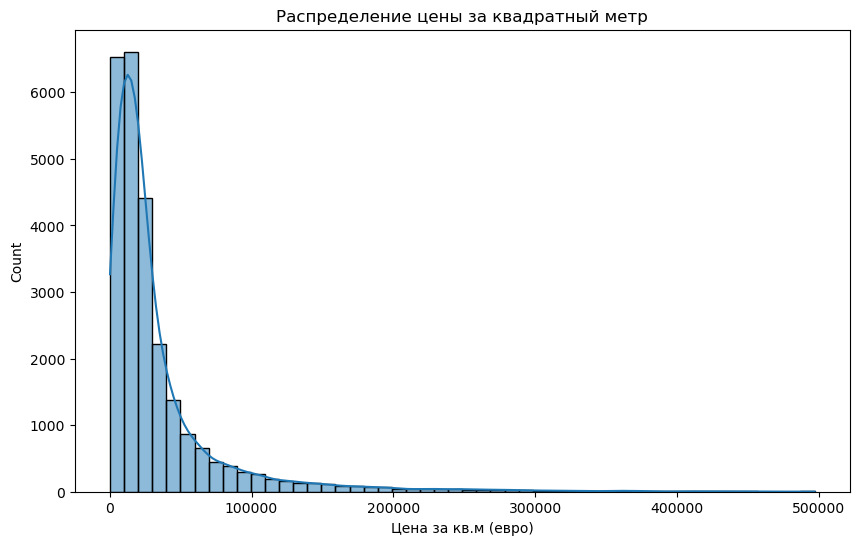

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['price_per_m2'], bins=50, kde=True)
plt.title('Распределение цены за квадратный метр')
plt.xlabel('Цена за кв.м (евро)')
plt.show()

# Время продажи

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


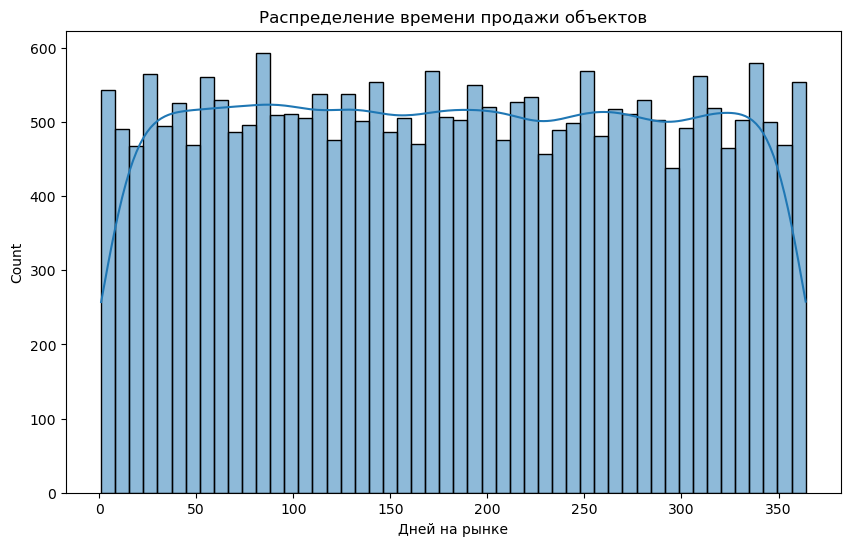

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['days_on_market'], bins=50, kde=True)
plt.title('Распределение времени продажи объектов')
plt.xlabel('Дней на рынке')
plt.show()

# Распределение по количествам комнат

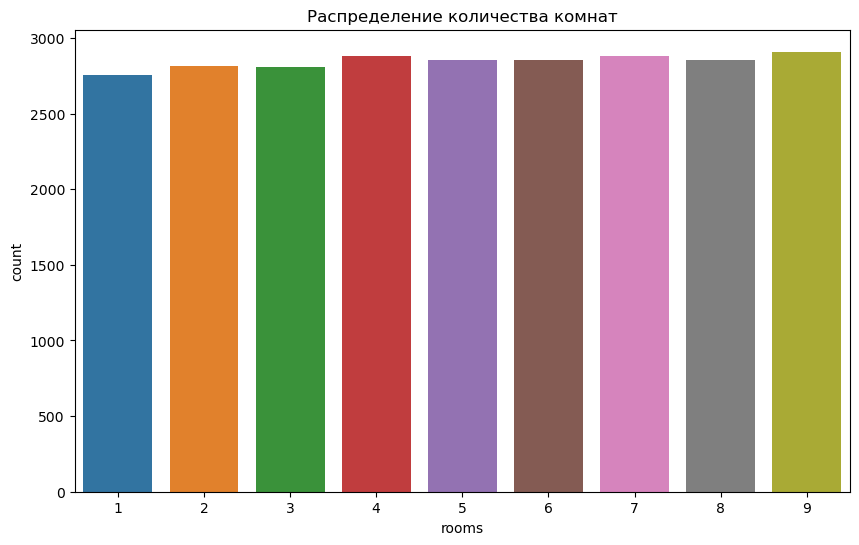

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='rooms', data=df)
plt.title('Распределение количества комнат')
plt.show()

1. Распределение количества комнат.
На данном графике показано распределение квартир по количеству комнат.
Распределение практически равномерное: для всех вариантов от 1 до 9 комнат количество предложений колеблется в диапазоне 260–290.
Это говорит о том, что рынок Берлина достаточно разнообразен и представлен объектами с разным количеством комнат, без ярко выраженного перекоса в сторону малогабаритных или многокомнатных квартир.
Такой баланс может свидетельствовать о широком спросе на жильё разного формата — как для одиночек и молодых пар, так и для семей.

# Анализ по этажам

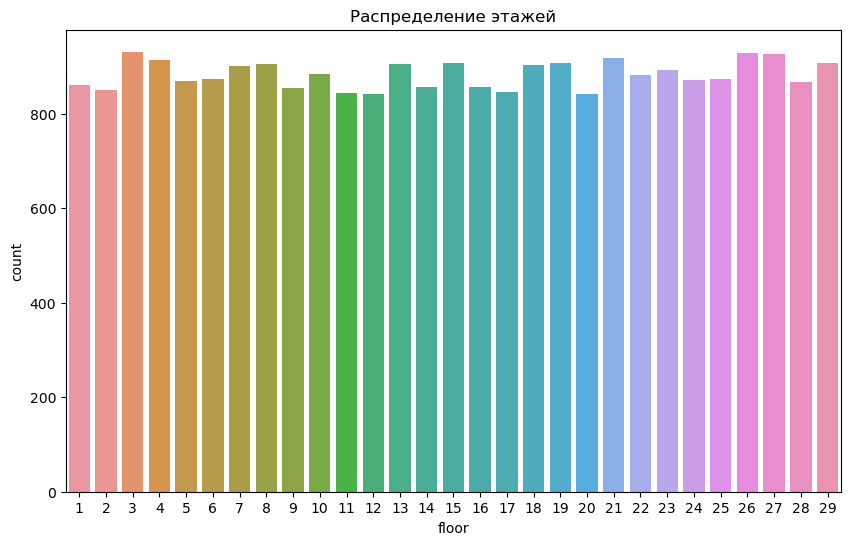

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='floor', data=df)
plt.title('Распределение этажей')
plt.show()

График — распределение квартир по этажам (floor).
Распределение также близко к равномерному, хотя есть небольшие всплески на некоторых этажах.
На каждом этаже (от 1 до 29) количество предложений находится примерно на одном уровне (60–110), что говорит о равномерной застройке и отсутствии явного предпочтения к определённым этажам.
Это может быть связано с тем, что в Берлине много многоквартирных домов с большим количеством этажей, и спрос распределён по ним равномерно.
Отсутствие явных пиков на первых или последних этажах говорит о том, что покупатели и продавцы не выделяют их как особо привлекательные или непривлекательные.

# Анализ цены по типу недвижимости

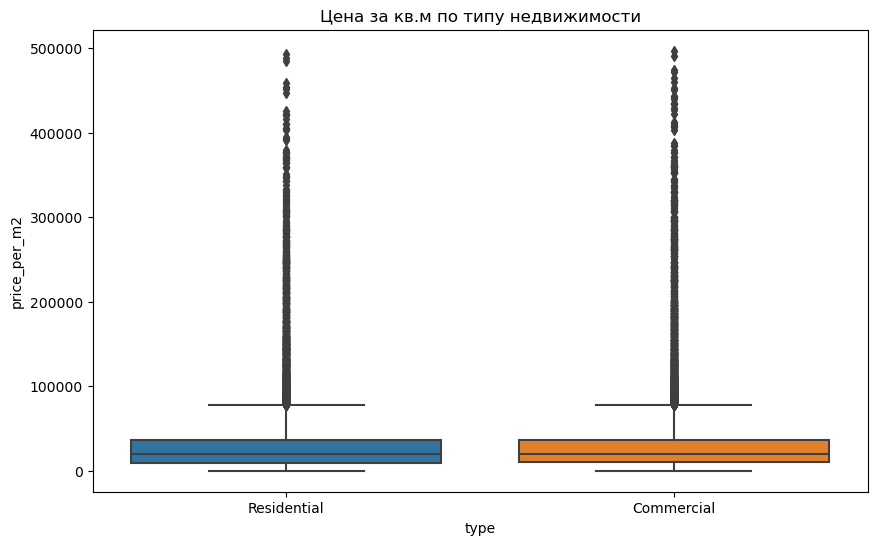

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='price_per_m2', data=df)
plt.title('Цена за кв.м по типу недвижимости')
plt.show()

Данный график показывает сколько дней объявления находятся на рынке (days_on_market).
Распределение дней на рынке также близко к равномерному, большинство объектов продаётся в течение года (до 365 дней).
Нет явных пиков или провалов, что свидетельствует о стабильности рынка: объекты недвижимости не «застаиваются» и не уходят слишком быстро.
Это может говорить о сбалансированном спросе и предложении: нет ажиотажа и нет переизбытка.
Наличие объектов, которые продаются как очень быстро, так и достаточно долго, указывает на разнообразие сегментов рынка по цене, состоянию, локации и другим характеристикам.

По проведенным исследованиям можно сделать выводы по рынку недвижимости в Берлине.
Рынок сбалансирован: нет явных перекосов по количеству комнат, этажности и срокам продажи.
Высокая ликвидность: большинство объектов продаётся в течение года, что говорит о стабильном спросе.
Разнообразие предложений: рынок подходит как для покупателей с разными бюджетами и потребностями, так и для инвесторов.
Равномерная застройка: отсутствие пиков по этажности и комнатности свидетельствует о продуманной городской инфраструктуре.

Широкий выбор квартир с разным количеством комнат и на разных этажах позволяет покупателям подобрать оптимальный вариант под любые нужды.
Стабильность сроков продажи и равномерное распределение по параметрам делают рынок Берлина привлекательным для инвестиций — можно рассчитывать на быструю продажу и низкие риски «зависания» объекта.